In [22]:
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

## Diagonalisation

In [94]:
A = np.array([3,4,2,1]).reshape(2,2)
A

array([[3, 4],
       [2, 1]])

Find the eigenvalues and vectors

In [100]:
lam,P = np.linalg.eig(A)
print(lam)
print(P)

[ 5. -1.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [ ]:
Pinv = np.linalg.inv(P)

In [101]:
P @ np.diag(lam) @ Pinv

array([[3., 4.],
       [2., 1.]])

In [71]:
Pinv=np.linalg.inv(P)

## Numerically solve the ODE

In [124]:
def dydt(t,y):
    A = np.array([[3,4],[2,1]])
    return A@y

In [135]:
x0 = np.array([1,2])

In [136]:
sol = solve_ivp(dydt,[0,1],x0,dense_output=True)

In [164]:
tfine = np.linspace(0,0.5,101)
ynum = sol.sol(tfine)

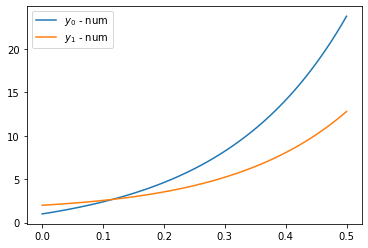

In [151]:
plt.plot(t,ynum[0],label=r'$y_0$ - num ')
plt.plot(t,ynum[1],label=r'$y_1$ - num ')
#plt.plot(t,2*np.exp(5*t)-np.exp(-t))
#plt.plot(t,  np.exp(5*t)+np.exp(-t))
plt.legend()


## Analytical solution

$\underline x(t)= \underline{\underline {P}} e^{\underline{\underline {D}}t}\underline{\underline P}^{-1} \underline {x}(0) $

In [165]:
ts= np.linspace(0,0.5,20)
sol2=np.array([ P @ np.diag([np.exp(5*t),np.exp(-t)]) @ Pinv @ x0 for t in ts  ]).T

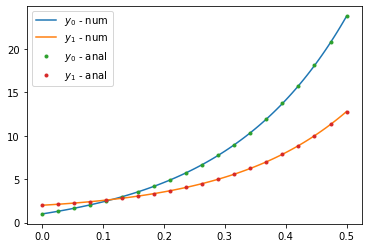

In [163]:
plt.plot(t,ynum[0],label=r'$y_0$ - num ')
plt.plot(t,ynum[1],label=r'$y_1$ - num ')
plt.plot(ts,sol2[0],'.',label=r'$y_0$ - anal')
plt.plot(ts,sol2[1],'.',label=r'$y_1$ - anal')
plt.legend()



In [180]:
sol2f=np.array([ P @ np.diag([np.exp(5*t),np.exp(-t)]) @ Pinv @ x0 for t in tfine  ]).T

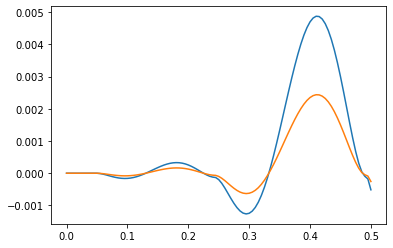

In [182]:
sol = solve_ivp(dydt,[0,1],x0,dense_output=True)#,max_step=1)
ynum = sol.sol(tfine)
plt.plot(t,sol2f[0]-ynum[0])
plt.plot(t,sol2f[1]-ynum[1])